<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tokenize-and-Extract-words" data-toc-modified-id="Tokenize-and-Extract-words-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tokenize and Extract words</a></span><ul class="toc-item"><li><span><a href="#make-tagger" data-toc-modified-id="make-tagger-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>make tagger</a></span></li><li><span><a href="#make-movie-title,-code-dictionary" data-toc-modified-id="make-movie-title,-code-dictionary-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>make movie title, code dictionary</a></span></li><li><span><a href="#cutoff" data-toc-modified-id="cutoff-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>cutoff</a></span></li><li><span><a href="#basic-cutoff-&gt;1" data-toc-modified-id="basic-cutoff->1-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>basic cutoff &gt;1</a></span></li><li><span><a href="#tokenizing" data-toc-modified-id="tokenizing-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>tokenizing</a></span></li><li><span><a href="#reset-cutoff" data-toc-modified-id="reset-cutoff-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>reset cutoff</a></span></li><li><span><a href="#split-data" data-toc-modified-id="split-data-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>split data</a></span></li></ul></li><li><span><a href="#Word-embedding" data-toc-modified-id="Word-embedding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Word embedding</a></span><ul class="toc-item"><li><span><a href="#Word2vec" data-toc-modified-id="Word2vec-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Word2vec</a></span></li><li><span><a href="#word2vec-parameters" data-toc-modified-id="word2vec-parameters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>word2vec parameters</a></span></li><li><span><a href="#word2vec-modeling" data-toc-modified-id="word2vec-modeling-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>word2vec modeling</a></span></li><li><span><a href="#get-vectors" data-toc-modified-id="get-vectors-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>get vectors</a></span></li><li><span><a href="#word2vec-visualization" data-toc-modified-id="word2vec-visualization-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>word2vec visualization</a></span></li><li><span><a href="#word2vec-evaluation-metrics---ranking-based" data-toc-modified-id="word2vec-evaluation-metrics---ranking-based-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>word2vec evaluation metrics - ranking based</a></span></li><li><span><a href="#word2vec-evaluation-metrics---Roc-curve" data-toc-modified-id="word2vec-evaluation-metrics---Roc-curve-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>word2vec evaluation metrics - Roc curve</a></span></li><li><span><a href="#word2vec-evaluation-metrics---Precision_recall" data-toc-modified-id="word2vec-evaluation-metrics---Precision_recall-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>word2vec evaluation metrics - Precision_recall</a></span></li></ul></li><li><span><a href="#Doc2vec" data-toc-modified-id="Doc2vec-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Doc2vec</a></span><ul class="toc-item"><li><span><a href="#Make-Labeled-sentence" data-toc-modified-id="Make-Labeled-sentence-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Make Labeled sentence</a></span></li><li><span><a href="#Doc2vec-modeling" data-toc-modified-id="Doc2vec-modeling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Doc2vec modeling</a></span></li><li><span><a href="#get-infer-vector" data-toc-modified-id="get-infer-vector-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>get infer vector</a></span></li><li><span><a href="#visualization" data-toc-modified-id="visualization-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>visualization</a></span></li><li><span><a href="#Doc2vec-evaluation-metrics---Top-n-accuracy" data-toc-modified-id="Doc2vec-evaluation-metrics---Top-n-accuracy-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Doc2vec evaluation metrics - Top-n accuracy</a></span></li><li><span><a href="#top5-10" data-toc-modified-id="top5-10-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>top5-10</a></span></li><li><span><a href="#Doc2vec-evaluation-metrics---Roc-curve" data-toc-modified-id="Doc2vec-evaluation-metrics---Roc-curve-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Doc2vec evaluation metrics - Roc curve</a></span></li><li><span><a href="#another-trial-for-roc-curve" data-toc-modified-id="another-trial-for-roc-curve-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>another trial for roc curve</a></span></li><li><span><a href="#precision-recall-curve" data-toc-modified-id="precision-recall-curve-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>precision recall curve</a></span></li></ul></li><li><span><a href="#3.-So.....-what?" data-toc-modified-id="3.-So.....-what?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>3. So..... what?</a></span></li></ul></div>

# TM PROJECT modeling

read data

In [1]:
import numpy as np
import pandas as pd
import os,pickle,re,time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

%matplotlib inline

os.chdir('D:/UNIST/18-1학기 자료/tm')

In [2]:
# read data
#df=pd.read_csv('df_cleaned.csv',index_col=0)
df=pd.read_csv('df_cleaned2.csv',index_col=0)

#df=pd.read_csv('formodeling.csv',encoding='cp949').iloc[:,2:-5] # old version
#df=pd.read_csv('question_answer.csv',encoding='utf-8')          # raw data

## Tokenize and Extract words

read stop word text

In [3]:
# stop words read
with open('stop_words.txt', 'rb') as f:
    stop_words = pickle.load(f) 

### make tagger

In [4]:
# get twitter tagger
from konlpy.tag import Twitter
tw=Twitter()

# 필요한 단어만 남기기 nouns
def twitter_nouns(text):
    result=tw.nouns(text)
    result=[word for word in result if len(word)>1]
    
    # delete stop words
    result=[word for word in result if word not in stop_words]
    return result

# 필요한 단어만 남기기 pos tagging 후 noun, adj, verb만 남기기
# 단어 길이 1> 필터링
def twitter_pos(text):
    pos=tw.pos(text,norm=True, stem=True)
    result=[word for word,tag in pos if tag in ['Noun','Adjective','Verb','Number']]
    result=[word for word in result if len(word)>1]
    
    # delete stop words
    result=[word for word in result if word not in stop_words]
    return result

### make movie title, code dictionary

In [5]:
# select movie
movie=df.iloc[:,[0,2,4]]
movie=movie.drop_duplicates().reset_index(drop=True)
movie=movie[movie.synopsis!='None'].reset_index(drop=True)

# movie code, movie title dictionary
movie_code_dictionary=dict(zip(movie.code,movie.movie))

print('sample examples of dictionary \n')
dict(list(movie_code_dictionary.items())[0:5])

sample examples of dictionary 



{'144944': '맨 인 더 다크',
 '151196': '원더',
 '19462': '모넬라',
 '34076': '에너미 라인스',
 '44982': '오퍼나지 - 비밀의 계단'}

### cutoff

Text(0,0.5,'percent')

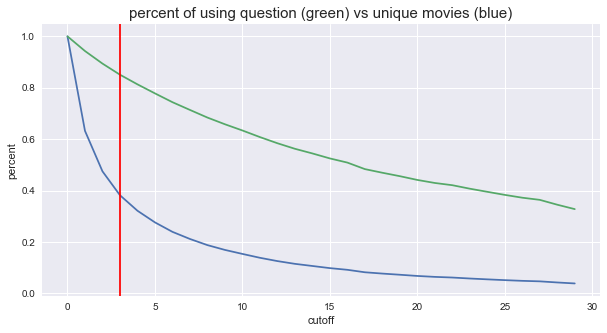

In [10]:
# cutoff 값 변화에 따른 사용하는 데이터 양 변화 추이

p_use_uniq_movie=[sum(df.code.value_counts()[df.code.value_counts().values>i])/len(df) for i in range(30)]
p_use_question=[sum(df.code.value_counts().values>i)/len(df.code.value_counts().values) for i in range(30)]

#plt.style.use('ggplot')
plt.figure(figsize=(10,5))

plt.title('percent of using question (green) vs unique movies (blue)',fontsize=15)
plt.plot(p_use_question)
plt.plot(p_use_uniq_movie)

plt.axvline(x=3, color = 'r') 
plt.xlabel('cutoff')
plt.ylabel('percent')

### basic cutoff >1

In [6]:
def delete_only_one_movie(df):
    # 중복 등장한 횟수로 새로운 변수 생성 
    count_dict=dict(df.code.value_counts())
    df['q_count']=df.code.map(count_dict)

    # n 번만 등장한 영화 재거
    df=df[df['q_count']>1]
    print('dataset shape :',df.shape)
    return df.reset_index(drop=True)

df=delete_only_one_movie(df)

dataset shape : (33518, 6)


### tokenizing

In [7]:
%%time
tokenizing_model=twitter_pos

# apply tokenizing model and make new columns
df['q_phrase']=df.question.apply(tokenizing_model)
movie['q_phrase']=movie.synopsis.apply(tokenizing_model)

# it will take about 3min

Wall time: 2min 37s


### reset cutoff

In [8]:
def delete_only_one_movie(df,cutoff_value):
    # 중복 등장한 횟수로 새로운 변수 생성 
    
    # 10개 이상 tag를 가진 질문만 남김
    df['tag_len']=df.q_phrase.apply(lambda x: len(x))
    df=df.query('tag_len>=10').reset_index(drop=True)
    
    # n 번만 등장한 영화 제거
    count_dict=dict(df.code.value_counts())
    df['q_count']=df.code.map(count_dict)
    df=df[df['q_count']>cutoff_value]
    
    print('cut off value is :',cutoff_value)
    print('number of data :',len(df))
    return df.loc[:,['code','q_phrase','question']].reset_index(drop=True)


# set cutoff value
cutoff_value=3
q=delete_only_one_movie(df,cutoff_value)

cut off value is : 3
number of data : 28275


### split data

In [9]:
from sklearn.model_selection import train_test_split

# split train test data (stratified)
train,test = train_test_split(q, random_state=42, train_size=0.8, test_size=0.2, stratify=q.code)

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

print('unique number of movie in train data: ',len(train.code.unique()))
print('unique number of movie in test data: ',len(test.code.unique()),'\n')
print('train data shape: ',train.shape)
print('test data shape: ',test.shape)

unique number of movie in train data:  2021
unique number of movie in test data:  2021 

train data shape:  (22620, 3)
test data shape:  (5655, 3)


## Word embedding

### Word2vec

insert movie code in every 5 tag

In [70]:
import itertools, operator
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# input : movie code
# output : code inserted tag list
# inserted movie code in every 5 tag  

def insert_code_q(code):
    q_a_dict=dict(zip(train.code,train.q_phrase))
    l=q_a_dict.get(code)
    
    n=5
    splited=[l[i:i+n] for i in range(0, len(l), n)]
    
    # insert tag
    for i in splited:
        i.append(code)
    
    # merge list in list to list
    merged = list(itertools.chain(*splited))
    return merged

In [71]:
%%time

# make corpus for word2vec
w_corpus=train.code.apply(insert_code_q)

Wall time: 50.3 s


### word2vec parameters

### word2vec modeling

In [72]:
%%time

# word2vec modeling
print('Training model...')

w_model=Word2Vec(w_corpus,sg=1,workers=4, min_count=5, size=300, window=10, seed = 42, iter=5, hs=1,negative=3)
#model=Word2Vec(w_corpus,sg=1,workers=4, min_count=5, size=300, window=10, seed = 42, iter=5, hs=1,negative=3)

Training model...
Wall time: 36.3 s


### get vectors

In [73]:
# make documnet vector 
# using every word in test set except words not in corpus
# get embedding vectors for every words
# sum of all word vectors in one document --> document vector
# return document vector

def get_documnet_vector(question):
    doc_vec=[]
    q_len=len(question)
    for word in question:
        try:
            doc_vec.append(w_model.wv[word])  
        except:
            pass # corpus에 없는 단어는 pass
    return sum(doc_vec)

# input code and get code vector 
def get_code_vector(test):
    unique_code=list(test.code.unique())
    code_vec_list=[w_model.wv[i] for i in unique_code]
    return code_vec_list

In [74]:
# get movie code vector, document vector in test set 
code_vec_list=get_code_vector(test)
test_vec=test.q_phrase.apply(get_documnet_vector)

print('the number of unique movies in test set : ', len(code_vec_list))
print('the number of questions in test set : ', len(test_vec))

the number of unique movies in test set :  2021
the number of questions in test set :  5655


### word2vec visualization

In [20]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [38]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

tsne_plot(w_model)

### word2vec evaluation metrics - ranking based

In [116]:
def get_similarity_dictionary_w2v(test_vec):
    w_model.random.seed(23)                    # set seed
    uniq_category=test.code.unique()    
    
    # get cosine similarity between one document and every unique movie code
    sim_list=[cosine_similarity(i.reshape(1,-1),test_vec.reshape(1,-1)).flatten()[0] for i in code_vec_list]
    
    sim_dict=dict(zip(uniq_category,sim_list))                                  # make dictionary - unique_test_code code and cosine similarity result list
    return sim_dict

In [117]:
%%time

# it takes long..
sim_dic=pd.Series(test_vec).apply(get_similarity_dictionary_w2v)

Wall time: 18min 10s


In [525]:
pd.to_pickle(sim_dic,'sim_dic.txt')

In [77]:
sim_dic=pd.read_pickle('sim_dic.txt')

In [88]:
# 각 code별 벡터와 document와의 cosine similarity 구하기
def get_most_similar_code_w2v(sim_dic):
    # make dictionary - unique_test_code code and cosine similarity result list
    sims = sorted(sim_dic.items(), key=operator.itemgetter(1), reverse=True)[:10]  # sorting based on similarity (top n)
    sim_code = [code for code, sim in sims]                                        # left only code
    return sim_code


# apply get_most_similar_code_w2v function on sim_dic
# if the code is in list --> 1 else --> 0
# return accuracy of the dataset

def get_acc_w2v(sim_dic,n):
    sim_code=list(sim_dic.apply(get_most_similar_code_w2v))
    code_list=list(test.code)
    acc=[code_list[i] in sim_code[i][:n] for i in range(len(sim_code))]
    return sum(acc)/len(acc)

In [89]:
%%time

print('Accuracy based on cosine similarity ranking (top 5) \n')
print('test set accuracy : ',get_acc_w2v(sim_dic,5))

Accuracy based on cosine similarity ranking (top 5) 

test set accuracy :  0.16357206012378425
Wall time: 3.97 s


In [92]:
result_wv=[get_acc_w2v(sim_dic,i) for i in range(1,11)]

In [106]:
np.mean(result_wv)

0.15819628647214856

Text(0,0.5,'Accuracy')

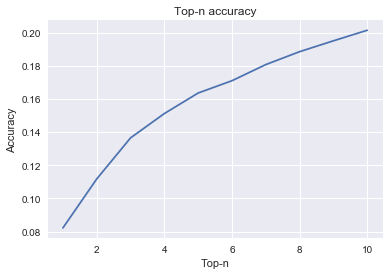

In [98]:
plt.title('Top-n accuracy')
plt.plot(range(1,11),result_wv)
plt.xlabel('Top-n')
plt.ylabel('Accuracy')

### word2vec evaluation metrics - Roc curve

In [80]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from itertools import cycle
from scipy import interp

In [102]:
def get_similarity_matrix_w2v(sim_dic):
    uniq_category=test.code.unique()  
    matrix =[np.array(pd.Series(uniq_category).map(i)) for i in sim_dic]
    
    return np.array(matrix)

In [ ]:
def another_roc(label_y,sim_matrix):
    result=label_y*sim_matrix
    y_true=test.code
    y_score=np.sum(result, axis=1)
    
    sim_test=sim_matrix/np.sum(sim_matrix,axis=0)

    true_index=[np.argmax(result[i]) for i in range(result.shape[0])]
    
    auc_list=[]
    for i in range(result.shape[0]):
        fpr, tpr, thresholds = roc_curve(y_true.unique(), sim_test[i], pos_label=y_true.unique()[true_index[i]]  )
        #plt.plot(fpr,tpr)
        auc_list.append(metrics.auc(fpr, tpr))
        
    return auc_list

In [103]:
%%time

sim_matrix=get_similarity_matrix_w2v(sim_dic)

# it takes about 18 min

# normalize similairty matrix
res=[sim_matrix[i]/np.sum(sim_matrix,axis=1)[i] for i in range(sim_matrix.shape[0])]
sim_test=np.array(res).reshape(sim_matrix.shape[0],-1)

### word2vec evaluation metrics - Precision_recall

In [498]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(label_y[:, i], sim_test[:, i])
    average_precision[i] = average_precision_score(label_y[:, i], sim_test[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(label_y.ravel(),
    sim_test.ravel())
average_precision["micro"] = average_precision_score(label_y, sim_test,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.02


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.02')

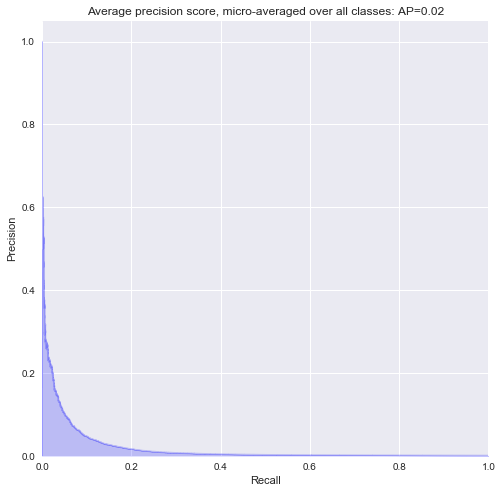

In [447]:
plt.figure(figsize=(8,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [104]:
uniq_category=test.code.unique()
n_classes=len(uniq_category)

# one-hot-encoding testset movie code
label_y=label_binarize(np.array(test.code),classes=uniq_category)

print('the number of questions in test set : ',len(test))
print('the number of unique movie code in test set : ',n_classes)
print('dimension of label after one-hot-encoding : ',label_y.shape)

the number of questions in test set :  5655
the number of unique movie code in test set :  2021
dimension of label after one-hot-encoding :  (5655, 2021)


In [262]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_y[:, i], sim_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(label_y.ravel(), sim_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

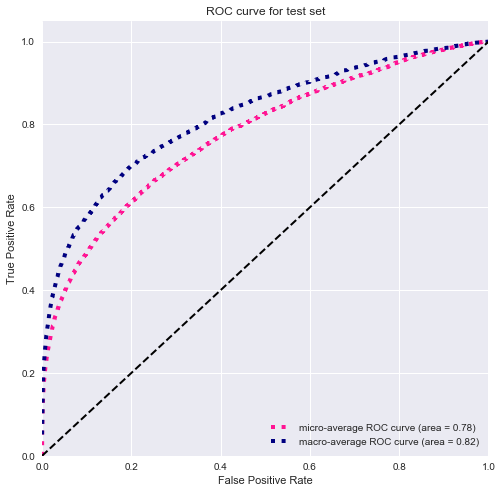

In [438]:
# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw = 2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

#colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
#for i, color in zip(range(3), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#             label='ROC curve of class {0} (area = {1:0.2f})'
#             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test set')
plt.legend(loc="lower right")
plt.show()

## Doc2vec

### Make Labeled sentence

In [11]:
# labeled sentence 생성
from gensim.models.doc2vec import LabeledSentence, Doc2Vec, TaggedDocument

# make Taggeddocument list (this is for training doc2vec model)
doc=[TaggedDocument(question, [code]) for question, code in list(zip(train.q_phrase, train.code))]
print('the number of tagged documnet :',len(doc))

the number of tagged documnet : 22620


### Doc2vec modeling

In [12]:
%%time

print('Training model...')

# modeling
model = Doc2Vec(doc, dm=0, dm_mean=0, alpha=0.1, size= 300, window = 3, min_count = 1, workers=4, seed = 42, iter=7, hs=1,negative=3)#1)#,negative=3)

#model = Doc2Vec(doc, alpha=0.1, size= 300, window = 6, min_count = 1, workers=4, seed = 42, iter=5, hs=1,negative=3)
#model = Doc2Vec(doc, alpha=0.01, size= 300, window = 15, min_count = 3, workers=-1, seed = 42, iter=20, hs=1,negative=5)
#model = Doc2Vec(doc, dm=1, dm_mean=1,alpha=0.1, size= 300, window =6 , min_count = 12, workers=4, seed = 42, iter=9, hs=1,negative=3)

Training model...
Wall time: 10.6 s


### get infer vector

In [109]:
# get only embeded vector information
def get_infer_vector():   
    train_list=list(train.q_phrase)
    test_list=list(test.q_phrase)
    
    train_vec=[]
    test_vec=[]
    
    for i in train_list:
        model.random.seed(23)
        train_vec.append(model.infer_vector(i,alpha=0.001))
    for j in test_list:
        model.random.seed(23)
        test_vec.append(model.infer_vector(j,alpha=0.001))
    
    print('train vector len :',len(train_vec))
    print('test vector len :',len(test_vec))
    
    return train_vec,test_vec

In [110]:
%%time
print('get embedded vectors ... \n')
train_vec,test_vec=get_infer_vector()

get embedded vectors ... 

train vector len : 22620
test vector len : 5655
Wall time: 12.1 s


### visualization

In [49]:
def tsne_plot(model):
    labels = list(test.code)[:200]
    tokens = test_vec[:200]
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

### Doc2vec evaluation metrics - Top-n accuracy

In [62]:
# 유사 영화 코드를 찾고, 정확도를 구함 
# get similar movie code (x)
def get_similar_code(test_vec):
    model.random.seed(23)
    sims = model.docvecs.most_similar([test_vec],topn=10)
    sim_code = [code for code, sim in sims]
    return sim_code

def get_acc(test,n):
    sim_code=list(pd.Series(test_vec).apply(get_similar_code))
    code_list=list(test.code)
    acc=[code_list[i] in sim_code[i][:n] for i in range(len(sim_code))]
    return (sum(acc)/len(acc))

print('Accuracy based on cosine similarity ranking (top 5) \n')
print('test set accuracy : ',get_acc(test,5))

Accuracy based on cosine similarity ranking (top 5) 

test set accuracy :  0.6721485411140583


### top5-10

In [54]:
result=[get_acc(test,i) for i in range(1,11)]

In [107]:
np.mean(result)

0.657471264367816

Text(0,0.5,'Accuracy')

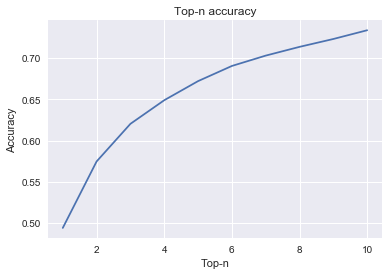

In [97]:
plt.title('Top-n accuracy')
plt.plot(range(1,11),result)
plt.xlabel('Top-n')
plt.ylabel('Accuracy')

### Doc2vec evaluation metrics - Roc curve

In [19]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from itertools import cycle
from scipy import interp

# doc2vec에 임베딩된 테스트셋 벡터를 이용하여 그와 유사한 모든 영화 코드, 유사도를 numpy array 형태로 구함
# Using Doc2vec model embedded testset vectors, get code and similarity result of other movie in numpy array form 
def get_similarity_matrix(test):
    uniq_category=test.code.unique() 
    return_all_similarity_result=lambda x: dict(model.docvecs.most_similar([x],topn=len(uniq_category)))
     
    sim_dic=pd.Series(test_vec).apply(return_all_similarity_result)
    matrix =[np.array(pd.Series(uniq_category).map(i)) for i in sim_dic]
    
    return np.array(matrix)

In [20]:
%%time

sim_matrix=get_similarity_matrix(test)

# normalize
res=[sim_matrix[i]/np.sum(sim_matrix,axis=1)[i] for i in range(sim_matrix.shape[0])]
sim_test=np.array(res).reshape(sim_matrix.shape[0],-1)

In [22]:
uniq_category=test.code.unique()
n_classes=len(uniq_category)

# one-hot-encoding testset movie code
label_y=label_binarize(np.array(test.code),classes=uniq_category,)

print('the number of questions in test set : ',len(test))
print('the number of unique movie code in test set : ',n_classes)
print('dimension of label after one-hot-encoding : ',label_y.shape)

the number of questions in test set :  5655
the number of unique movie code in test set :  2021
dimension of label after one-hot-encoding :  (5655, 2021)


In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
th=dict()
for i in range(n_classes):
    fpr[i], tpr[i], th[i] = roc_curve(label_y[:, i], sim_matrix[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(label_y.ravel(), sim_matrix.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

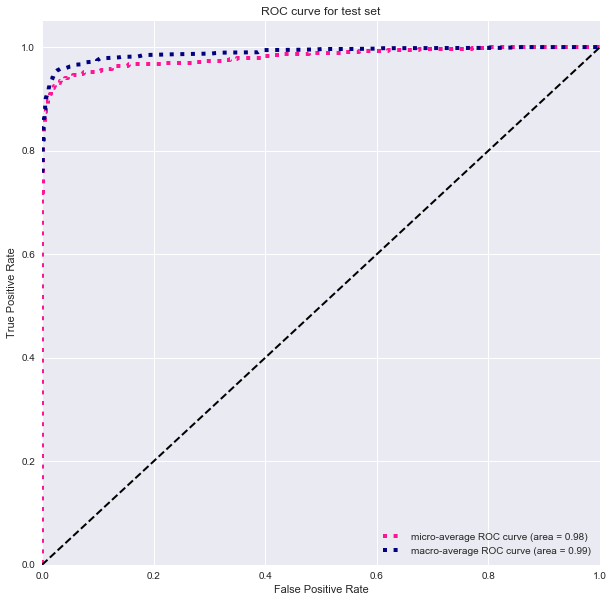

In [85]:
# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw=2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test set')
plt.legend(loc="lower right")

### another trial for roc curve

In [204]:
def another_roc(label_y,sim_matrix):
    result=label_y*sim_matrix
    y_true=test.code
    y_score=np.sum(result, axis=1)
    
    sim_test=sim_matrix/np.sum(sim_matrix,axis=0)

    true_index=[np.argmax(result[i]) for i in range(result.shape[0])]
    
    auc_list=[]
    for i in range(result.shape[0]):
        fpr, tpr, thresholds = roc_curve(y_true.unique(), sim_test[i], pos_label=y_true.unique()[true_index[i]]  )
        #plt.plot(fpr,tpr)
        auc_list.append(metrics.auc(fpr, tpr))
        
    return auc_list

In [205]:
al=another_roc(label_y,sim_matrix)

### precision recall curve

In [113]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def get_f1_score_max():

    fscore=[]
    pscore=[]
    rscore=[]
    # this is threshold
    thr=np.arange(0,np.max(sim_test),0.0001)
    
    for i in thr:    
        ytr=label_y
        ypr=np.where(sim_test>=i,1,0)
        fscore.append(f1_score(ytr,ypr,average='micro'))
        pscore.append(precision_score(ytr,ypr,average='micro'))
        rscore.append(recall_score(ytr,ypr,average='micro'))
    return fscore,pscore,rscore

In [114]:
fscore,pscore,rscore=get_f1_score_max()

thr=np.arange(0,np.max(sim_test),0.0001)

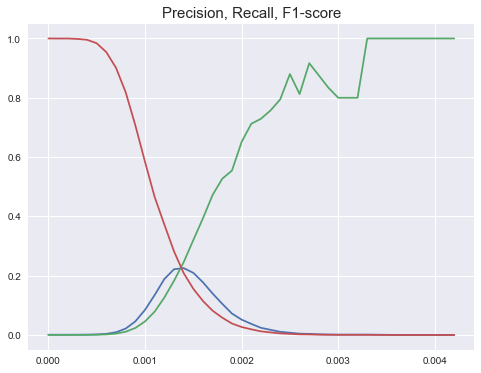

In [143]:
plt.figure(figsize=(8,6))
plt.title('Precision, Recall, F1-score',fontsize=15)
plt.plot(thr,fscore)
plt.plot(thr,pscore)
plt.plot(thr,rscore)

In [176]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(label_y[:, i], sim_test[:, i])
    average_precision[i] = average_precision_score(label_y[:, i], sim_test[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(label_y.ravel(),
    sim_test.ravel())
average_precision["micro"] = average_precision_score(label_y, sim_test,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.15


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.15')

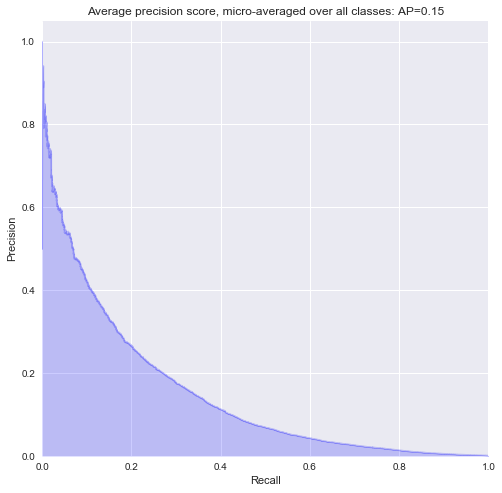

In [193]:
plt.figure(figsize=(8,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))